<img
src="https://www.imt-atlantique.fr/sites/default/files/logo_mt_0_0.png"
WIDTH=180 HEIGHT=180>

<CENTER>
</br>
<p><font size="5">  TAF MCE - Machine Learning  </font></p>
<p><font size="5">  Kernel methods: statement  </font></p>
<p><font size="5">  Students: Gonzalo Quintana and Tales Marra  </font></p>
</p>
</CENTER>

----------------------------

## I - Kernel density estimation

> 1. Implement the kernel density estimator with a Gaussian kernel in a function **kde(x,data=data,h=0)** where $x$ represents the locations where the density estimator is computed, $data$ the data and $h$ the bandwidth. For default value $h=0$ the bandwidth should be changed inside the function to the standard Sylverman bandwidth estimator. 
> 2. For $n=100$ samples of a $\mathcal{N}(1,1)$ distribution, plot the pdf and its estimator. 
> 3. Check the influence of the value of the bandwidth parameter.
<!--Use bandwidth parameter suggested in (https://en.wikipedia.org/wiki/Kernel_density_estimation).--> 

In [1]:
%matplotlib inline
import scipy.signal
import scipy.stats as stats
import math as m
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math


In [65]:
def gaussian(x):
    
    return m.exp(-x**2/2)/m.sqrt(2*m.pi)

def kde(x,data,h=0):
    
    p_hat = np.zeros(np.shape(x))
    N = np.shape(data)[0]
    
    if h==0:
        h = 1.06*np.std(data)*N**(-1/5)
        
    for i,xi in enumerate(x):
        S=0
        for d in data:
            S += gaussian((xi-d)/h)
        p_hat[i]= S/(N*h)
        
    return p_hat

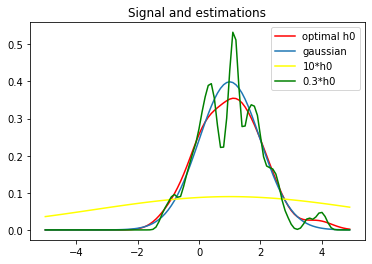

In [66]:
n=100
x = np.arange(-5, 5, 0.1)
data=np.random.normal(1,1,n)
p=kde(x,data)
plt.plot(x,p,c='red')
plt.title('Signal and estimations')
plt.plot(x,stats.norm.pdf(x,1,1))
p2 = kde(x,data,h = 10*1.06*np.std(data)*n**(-1/5))
plt.plot(x,p2,c='yellow')
p3 = kde(x,data,h = 0.3*1.06*np.std(data)*n**(-1/5))
plt.plot(x,p3,c='green')
plt.legend(['optimal h0','gaussian','10*h0','0.3*h0'])
plt.show()

## II - Kernel regression

Assume a pair $(X,Y)$ of random variables, with $p(x)\sim\mathcal{U}_{[-3,3]}$ and $p(y\vert x)\sim\mathcal{N}(x^2+\exp(-x),10\cos^2x)$. 

> Implement the kernel approximation of the regression curve $\mathbb{E}[Y\vert X=x]$ and of linear regression. Test your code with sample size $n=10^4$.

In [73]:
def kernel_regression(y,x,taxis,N):
    
    y_hat = []
        
    h = 1.06*np.std(x)*N**(-1/5)
    
    for z in taxis:
    
        num = np.sum([(yi/(np.sqrt(2*math.pi)*h))*np.exp(-1/2*((z-xi)/h)**2)for xi,yi in zip(x,y)])

        den = np.sum([(1/(np.sqrt(2*math.pi)*h))*np.exp(-1/2*((z-xi)/h)**2)for xi in x])
        
        y_hat.append(num/den)

    return y_hat
    

In [74]:
n = 10000
x = np.random.uniform(-3,3,n)
y = np.array([np.random.normal(xi**2+math.exp(-xi),10*np.cos(xi)**2)  for xi in x])
taxis = np.arange(-3, 3, 0.1)
y_hat = kernel_regression(y,x,taxis,n)

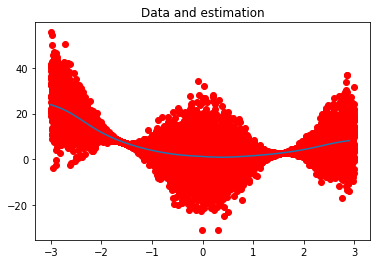

In [77]:
plt.scatter(x,y,c='red')
plt.title('Data and estimation')
plt.plot(taxis,y_hat)
plt.show()

## III - KNN

We consider 2D data generated using the code below. Each line of dataX and dataY represents points form a distinct class

    ns  = 200  # number of samples per class
    nc = 3    # number of classes
    dataX  = zeros(shape=(nc,ns))
    dataY  = zeros(shape=(nc,ns))
    dataX[0,:]  = randn(ns)
    dataY[0,:]  = sin(2*dataX[0,:]) + sqrt(.1)*randn(ns)
    dataX[1,:]  = -1 + .5*randn(ns)
    dataY[1,:]  =  1 + .5*randn(ns)
    dataX[2,:]  =  1 + .5*randn(ns)
    dataY[2,:]  = -1 + .5*randn(ns)

> 1. Visualize data and their class using a scatter plot.
> 2. Discretize the area $[-3,3]\times[-3,3]$ with 100 points per axis. For each point, compute the minimum surface $Z_{ij}=S(X_{ij},Y_{ij})$ of the disk that encloses the K nearest neighbors and represent a contour plot of $Z$
> 3. For each point of the surface, compute the posterior probabilities of the classes and plot the posterior probability map for each class. 
> 4. Plot the decision map for the class that supplies the decided class for each point based on posterior probability maximization.


Note: you could alternatively use scikit learn (https://scikit-learn.org/stable/modules/neighbors.html)

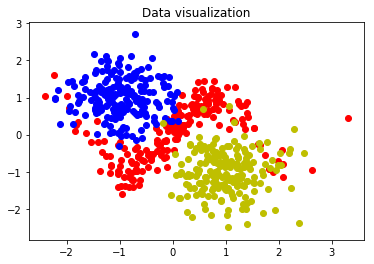

In [3]:
ns  = 200  # number of samples per class
nc = 3    # number of classes
dataX  = np.zeros(shape=(nc,ns))
dataY  = np.zeros(shape=(nc,ns))
dataX[0,:]  = np.random.randn(ns)
dataY[0,:]  = np.sin(2*dataX[0,:]) + math.sqrt(.1)*np.random.randn(ns)
dataX[1,:]  = -1 + .5*np.random.randn(ns)
dataY[1,:]  =  1 + .5*np.random.randn(ns)
dataX[2,:]  =  1 + .5*np.random.randn(ns)
dataY[2,:]  = -1 + .5*np.random.randn(ns)
plt.figure()
plt.title('Data visualization')
plt.scatter(dataX[0,:],dataY[0,:],c='r')
plt.scatter(dataX[1,:],dataY[1,:],c='b')
plt.scatter(dataX[2,:],dataY[2,:],c='y')
plt.show()

In [3]:
x_min = -2
y_min = -2
x_max = 2
y_max = 2
h = 0.1
n_neighbors = 100

#xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                     np.arange(y_min, y_max, h))

xx,yy = np.arange(x_min, x_max, h),np.arange(y_min, y_max, h)
dataX = dataX.reshape(1,ns*nc)
dataY = dataY.reshape(1,ns*nc)

## Calculating radius 

K = 5
result = list()
for x in xx:
    for y in yy:
        dists = [np.sqrt((x-xi)**2+(y-yi)**2) for xi,yi in zip(dataX,dataY)]
        idx = np.argpartition(dists, K)
        dists[0].sort()
        r = dists[0][K-1]
        result.append([x,y,r])

Plotting the circles from question 2:

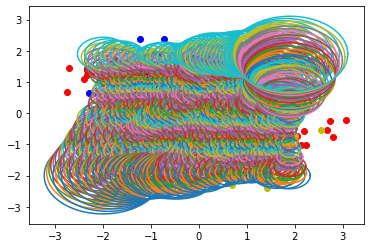

In [61]:
for x,y,r in result:
    theta = np.arange(0,2*math.pi,0.01)
    x1 = [r*math.cos(thetae)+x for thetae in theta]
    y1 = [r*math.sin(thetae)+y for thetae in theta]
    plt.plot(x1,y1)

ns  = 200  # number of samples per class
nc = 3    # number of classes
dataX  = np.zeros(shape=(nc,ns))
dataY  = np.zeros(shape=(nc,ns))
dataX[0,:]  = np.random.randn(ns)
dataY[0,:]  = np.sin(2*dataX[0,:]) + math.sqrt(.1)*np.random.randn(ns)
dataX[1,:]  = -1 + .5*np.random.randn(ns)
dataY[1,:]  =  1 + .5*np.random.randn(ns)
dataX[2,:]  =  1 + .5*np.random.randn(ns)
dataY[2,:]  = -1 + .5*np.random.randn(ns)
plt.scatter(dataX[0,:],dataY[0,:],c='r')
plt.scatter(dataX[1,:],dataY[1,:],c='b')
plt.scatter(dataX[2,:],dataY[2,:],c='y')
plt.show()

In [64]:
x_min = -2
y_min = -2
x_max = 2
y_max = 2
h = 0.1
n_neighbors = 100


xx,yy = np.arange(x_min, x_max, h),np.arange(y_min, y_max, h)
dataX = dataX.reshape(1,ns*nc)
dataY = dataY.reshape(1,ns*nc)

## Calculating radius 

K = 5

x_list = list()
y_list = list()
pa_list = list()
pb_list = list()
pc_list = list()
class_list = list()
class_a_x = list()
class_a_y = list()
class_b_x = list()
class_b_y = list()
class_c_x = list()
class_c_y = list()
for x in xx:
    for y in yy:
        dists = [np.sqrt((x-xi)**2+(y-yi)**2) for xi,yi in zip(dataX,dataY)]
        
        idx = np.argpartition(dists[0][:],K)
        pa = 0
        pb = 0
        pc = 0
        
        for i in range(0,K):
            
            if idx[i]<200:
                pa += 1/K
            elif idx[i]<400:
                pb += 1/K
            else:
                pc += 1/K
                
        if pa>pb and pa>pc:
            chosen_class = 0
            class_a_x.append(x)
            class_a_y.append(y)
        elif pb>pc:
            chosen_class = 1
            class_b_x.append(x)
            class_b_y.append(y)
        else:
            chosen_class = 2
            class_c_x.append(x)
            class_c_y.append(y)
        
        x_list.append(x)
        y_list.append(y)
        pa_list.append(pa)
        pb_list.append(pb)
        pc_list.append(pc)
        class_list.append(chosen_class)

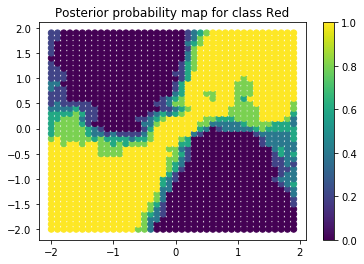

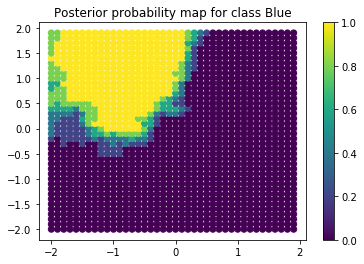

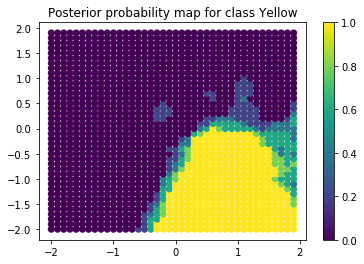

In [61]:
plt.scatter(x_list,y_list,c=pa_list)
plt.title("Posterior probability map for class Red")
plt.colorbar()
plt.show()

plt.scatter(x_list,y_list,c=pb_list)
plt.title("Posterior probability map for class Blue")
plt.colorbar()
plt.show()

plt.scatter(x_list,y_list,c=pc_list)
plt.title("Posterior probability map for class Yellow")
plt.colorbar()
plt.show()

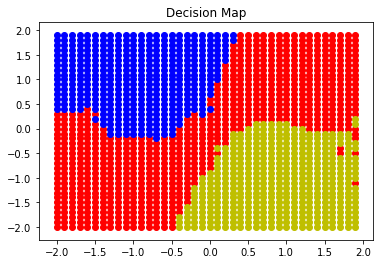

In [67]:
plt.scatter(class_a_x,class_a_y,c='r')
plt.scatter(class_b_x,class_b_y,c='b')
plt.scatter(class_c_x,class_c_y,c='y')
plt.title("Decision Map")
plt.show()

## IV - Kernel methods with scikit-learn

We illustrate the use of scikit-learn for kernel density estimation by considering a simple example.

> 1. generate a set of data that contains $2.10^4$ samples with $\mathcal{N}(0,100)$ distribution, $10^4$ samples with $\mathcal{N}(3,1)$ distribution and $10^4$ samples with $\mathcal{N}(2,4)$ distribution.
> 2. Plot the kernel density estimator obtained using the **KernelDensity** function of scikit-learn.


Note that you could also use scikit learn for KNN estimation in setion III (https://scikit-learn.org/stable/modules/neighbors.html)

In [12]:
from pylab import *
%matplotlib inline

from sklearn.neighbors import KernelDensity
import scipy.stats as st

In [46]:
n1 = 20000
n2 = 10000
n3 = 10000
x = np.arange(-3, 3, 0.01)

norm1 = np.random.randn((n1))*100
norm2 = np.random.randn((n2))*1 +3 
norm3 = np.random.randn((n3))*4 +2

data = norm1.tolist() + norm2.tolist() + norm3.tolist()

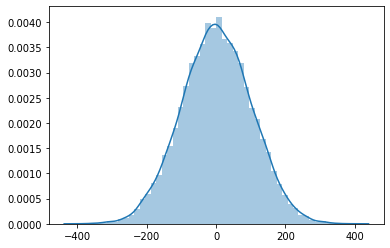

In [69]:
import seaborn as sns
sns.distplot(norm1,kde=True)
plt.show()

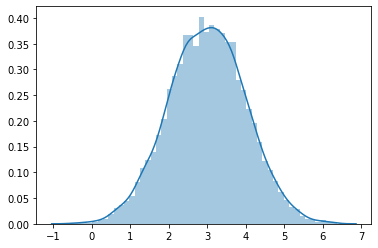

In [70]:
sns.distplot(norm2,kde=True)
plt.show()

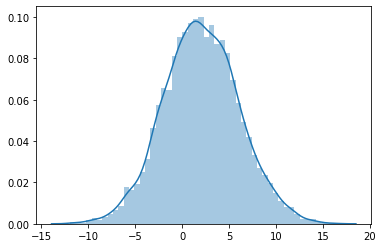

In [71]:
sns.distplot(norm3,kde=True)
plt.show()

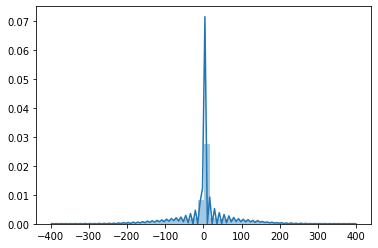

In [72]:
sns.distplot(data,kde=True)
plt.show()